### Exploratory Data Analysis


In [17]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [18]:
df=pd.read_csv('/Users/alvina/cars_cleaned.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361516 entries, 0 to 361515
Data columns (total 14 columns):
price           361516 non-null int64
year            361516 non-null float64
manufacturer    361516 non-null object
model           361516 non-null object
condition       361516 non-null object
cylinders       361516 non-null object
fuel            361516 non-null object
odometer        361516 non-null float64
title_status    361516 non-null object
transmission    361516 non-null object
drive           361516 non-null object
size            361516 non-null object
type            361516 non-null object
paint_color     361516 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 38.6+ MB


### How many years, makes, models are in the dataset?

In [20]:

print('Number of unique years is %s' % len(df.year.unique()))
print('Number of unique models is %s' % len(df.model.unique()))
print('Number of unique manufacturers is %s' % len(df.manufacturer.unique()))


Number of unique years is 36
Number of unique models is 26142
Number of unique manufacturers is 42


#### Distribution of used car data v/s year

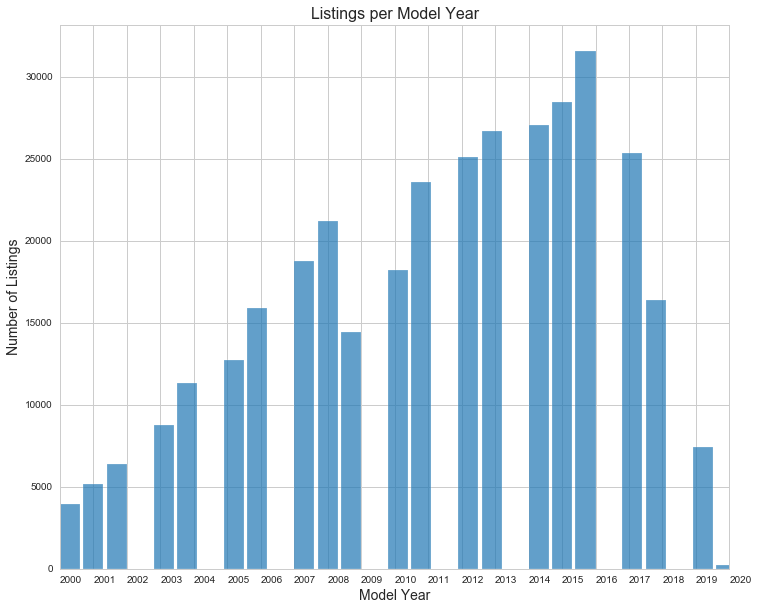

In [36]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
sns.distplot(df.year,kde=False, hist_kws={"alpha":0.7,'width':0.6})
plt.title('Listings per Model Year',fontsize=16)
plt.xticks(sorted(df.year.unique()),horizontalalignment='left')
plt.ylabel('Number of Listings',fontsize=14)
plt.xlabel('Model Year', fontsize=14)
plt.xlim(2000,2020)
plt.show()

#### There are more number listing for year 2016 and count goes above 30,000. Also the lowest number falls at 2020 as the data scraped contains listing untill January.

### Number of listing per manufacturer

In [37]:
print ("The unique manufacturers:")
print (df['manufacturer'].unique())

The unique manufacturers:
['volkswagen' 'gmc' 'ford' 'ram' 'toyota' 'chevrolet' 'mercedes-benz'
 'jeep' 'honda' 'lexus' 'cadillac' 'dodge' 'hyundai' 'subaru' 'bmw'
 'chrysler' 'nissan' 'mitsubishi' 'acura' 'kia' 'rover' 'alfa-romeo'
 'saturn' 'pontiac' 'jaguar' 'fiat' 'volvo' 'audi' 'mini' 'mazda'
 'infiniti' 'lincoln' 'buick' 'mercury' 'harley-davidson' 'tesla' 'porche'
 'datsun' 'ferrari' 'land rover' 'hennessey' 'aston-martin']


Text(0.5, 1.0, 'Manufacturers vs no. of listings')

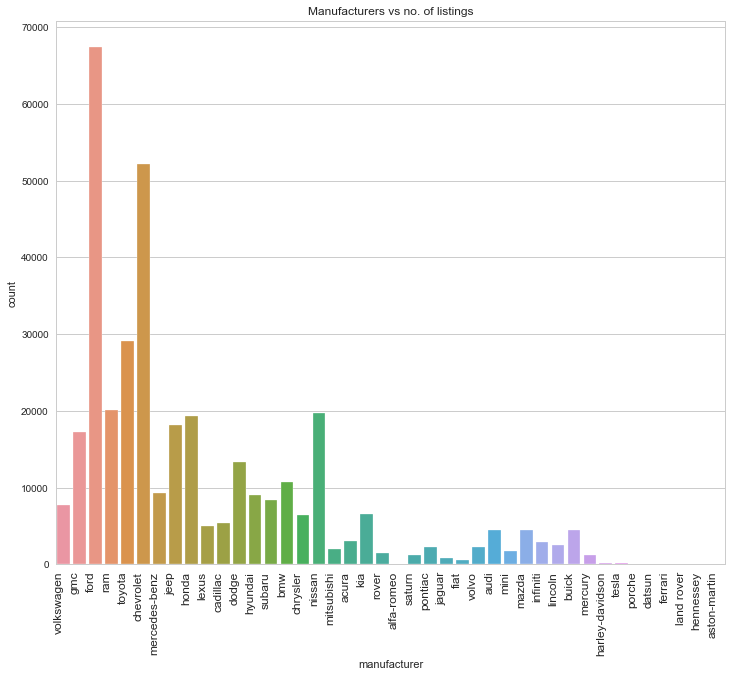

In [38]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x='manufacturer',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12);
plt.title("Manufacturers vs no. of listings")

#### Ford contains most number of listing. The top 5 manufacturers with most number of listing are:
- Ford
- Chevrolet
- Toyota
- Ram
- Nissan

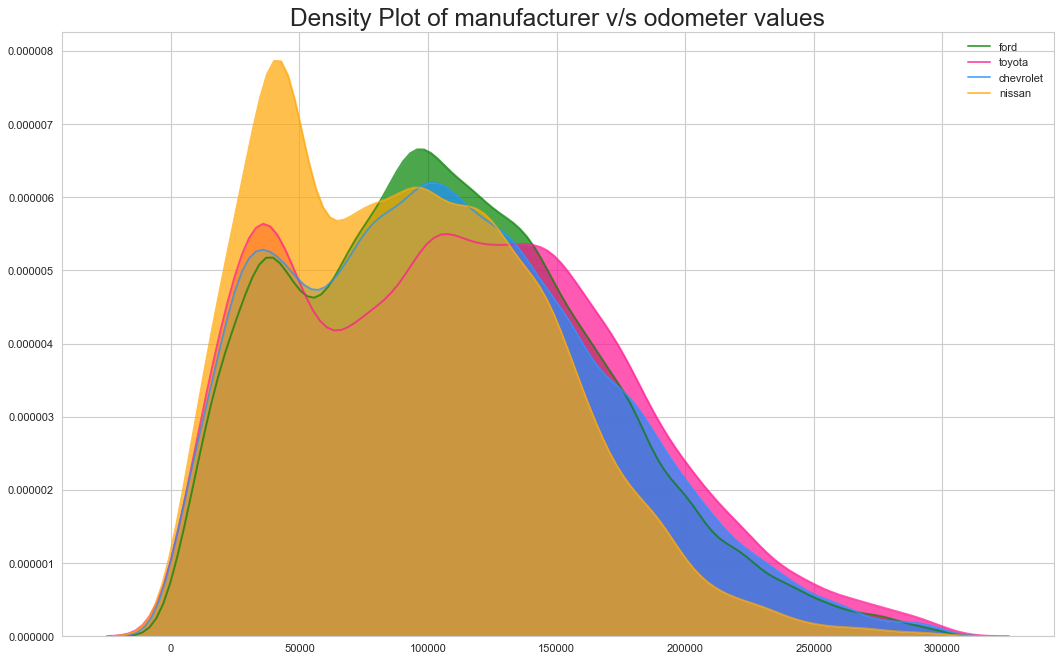

In [52]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['manufacturer'] == 'ford', "odometer"], shade=True, color="g", label="ford", alpha=.7)
sns.kdeplot(df.loc[df['manufacturer'] == 'toyota', "odometer"], shade=True, color="deeppink", label="toyota", alpha=.7)
sns.kdeplot(df.loc[df['manufacturer'] == 'chevrolet', "odometer"], shade=True, color="dodgerblue", label="chevrolet", alpha=.7)
sns.kdeplot(df.loc[df['manufacturer'] == 'nissan', "odometer"], shade=True, color="orange", label="nissan", alpha=.7)

# Decoration
plt.title('Density Plot of manufacturer v/s odometer values', fontsize=22)
plt.legend()
plt.show()

### Average price of each manufacturer

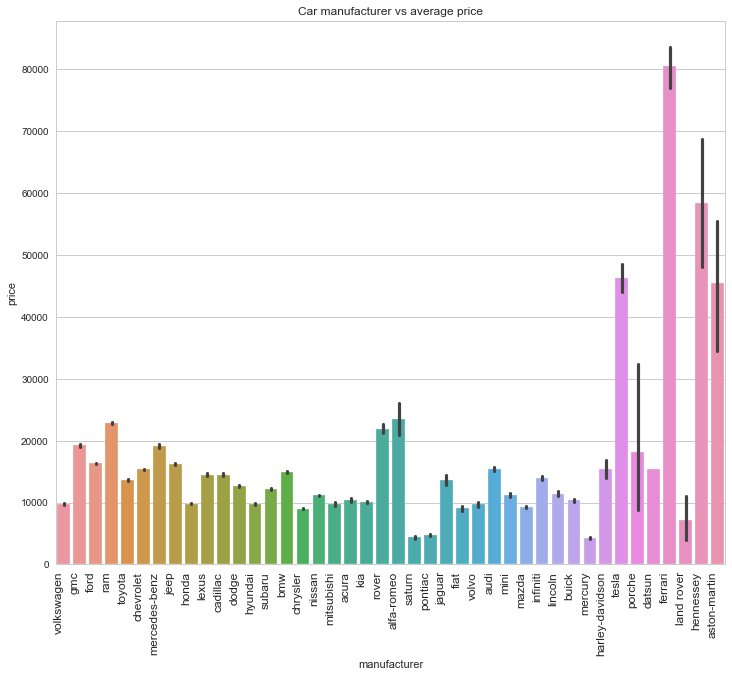

In [39]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x='manufacturer', y='price', data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12);
plt.title("Car manufacturer vs average price");

### The high cost listing in the dataset is for Ferrari. The Top 3 high cost listings are:
- Ferrari
- hennessey
- Aston-martin


### Odometer values of overall listing

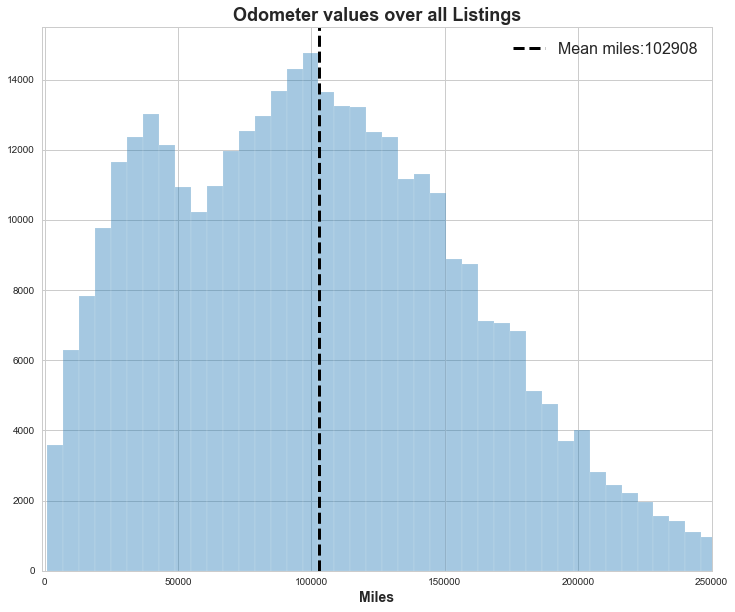

In [22]:
# look at miles overall distribution
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
sns.distplot(df.odometer,kde=False)
plt.xlabel('Miles',fontsize=14,fontweight="bold")
plt.axvline(df.odometer.mean(),lw=3,ls='dashed',
            color='black',label='Mean miles:'+'{0:.0f}'.format(np.mean(df.odometer)))
plt.title('Odometer values over all Listings',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)
plt.xlim(-1000,250000)
plt.show()

#### The average distance in all listing is 102908.

### Type of car in terms of paint color

In [40]:
import plotly.graph_objects as go

In [41]:
gasLabels = df[df["fuel"]=="gas"].paint_color.value_counts().head(10).index
gasValues = df[df["fuel"]=="gas"].paint_color.value_counts().head(10).values
dieselLabels = df[df["fuel"]=="diesel"].paint_color.value_counts().head(10).index
dieselValues = df[df["fuel"]=="diesel"].paint_color.value_counts().head(10).values
electricLabels = df[df["fuel"]=="electric"].paint_color.value_counts().head(10).index
electricValues = df[df["fuel"]=="electric"].paint_color.value_counts().head(10).values

from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gasLabels, values=gasValues, name="Gas Car"),
              1, 1)
fig.add_trace(go.Pie(labels=dieselLabels, values=dieselValues, name="Diesel Car"),
              1, 2)
fig.add_trace(go.Pie(labels=electricLabels, values=electricValues, name="Electric Car"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.show()

### Cylinders v/s number of count

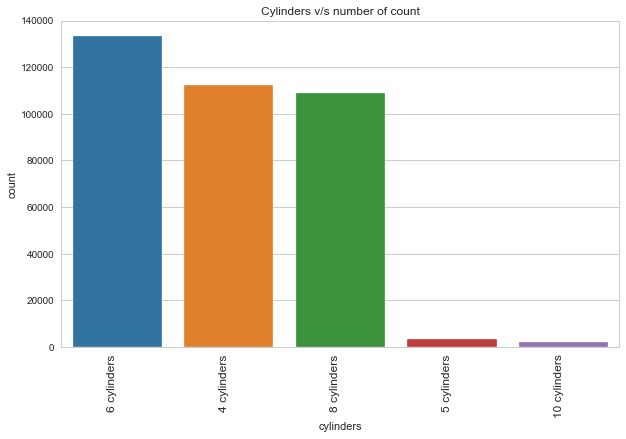

In [35]:
plt.figure(figsize=(10,6))
years = df['cylinders'].value_counts().iloc[:5]
years = pd.DataFrame({'cylinders' : years.index, 'count' : years.values.astype(int)})
ax = sns.barplot(x='cylinders', y='count', data=years, order = years['cylinders']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12);
plt.title("Cylinders v/s number of count");# fig = plt.figure(figsize = (20,20))

#### 6 cylinders cars are more in this listing.

### Distribution of miles per model Year

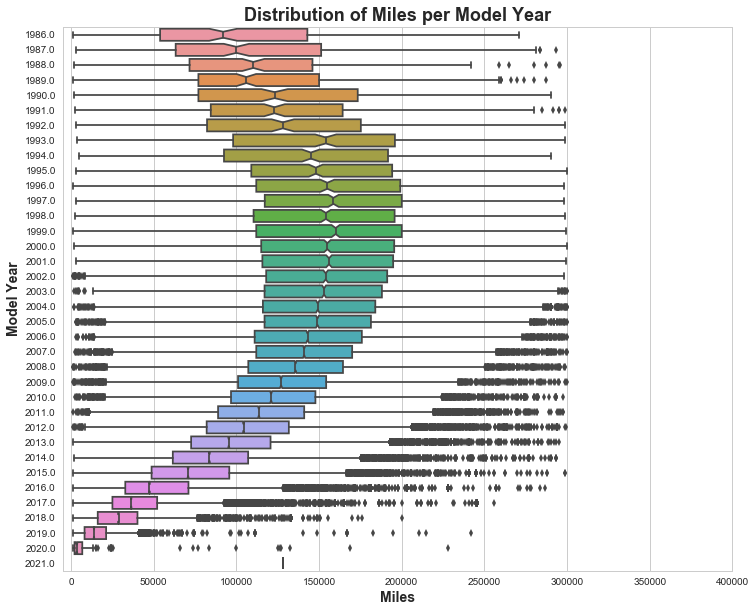

In [44]:

# look at miles by year boxplot
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
sns.boxplot(x='odometer',y='year',data=df,notch=True,orient='h')
plt.xlabel('Miles',fontsize=14,fontweight="bold")
ax.set_yticklabels(sorted(df.year.unique()))
plt.ylabel('Model Year',fontsize=14,fontweight="bold")
plt.title('Distribution of Miles per Model Year',fontsize=18,fontweight="bold")
plt.xlim(-5000,400000)
plt.show()

### Distribution of prices of overall listing

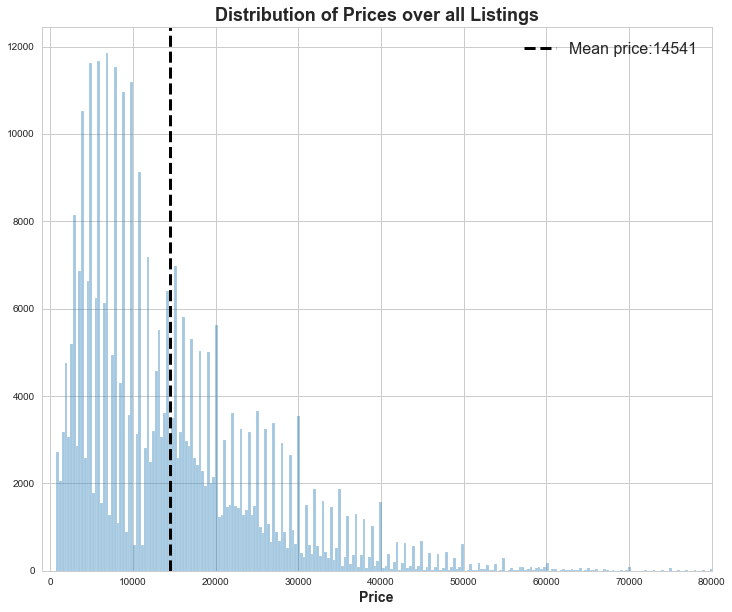

In [48]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
sns.distplot(df.price,kde=False,bins=300)
plt.xlabel('Price',fontsize=14,fontweight="bold")
plt.axvline(df.price.mean(),lw=3,ls='dashed',
            color='black',label='Mean price:'+'{0:.0f}'.format(np.mean(df.price)))
plt.title('Distribution of Prices over all Listings',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)
plt.xlim(-1000,80000)
plt.show()


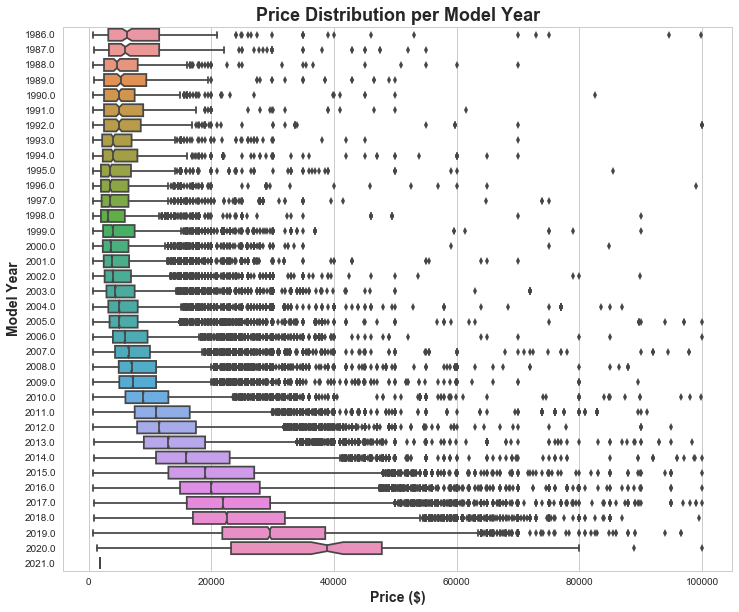

In [50]:

fig = plt.figure(figsize=(12,10))
ax = fig.gca()
sns.boxplot(x='price',y='year',data=df[df.price < 150000],
            order=sorted(df.year.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
#ax.set_yticklabels(sorted(cc_data.modelYear.unique()))
plt.ylabel('Model Year',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Model Year',fontsize=18,fontweight="bold")
plt.show()